In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [12]:
files = list(filter(lambda v:".csv" in v,os.listdir()))

In [23]:
data = np.loadtxt(files[0],delimiter=',')

In [24]:
def plotTraj(data):
    plt.figure(figsize=(5,5))
    plt.axes().set_aspect('equal', 'datalim')
    plt.plot(data[:,3]-data[0,3],data[:,4]-data[0,4])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True,which='major')
    plt.tight_layout()

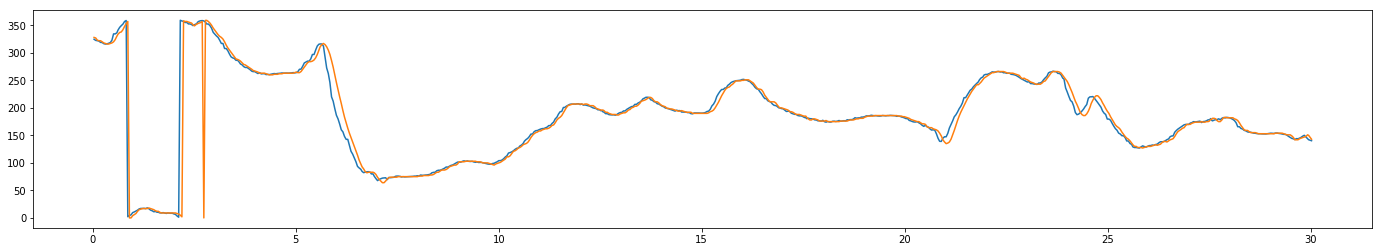

Cross Correlation Maxima : -1, Mean time lag : -0.039±-0.00346 secs


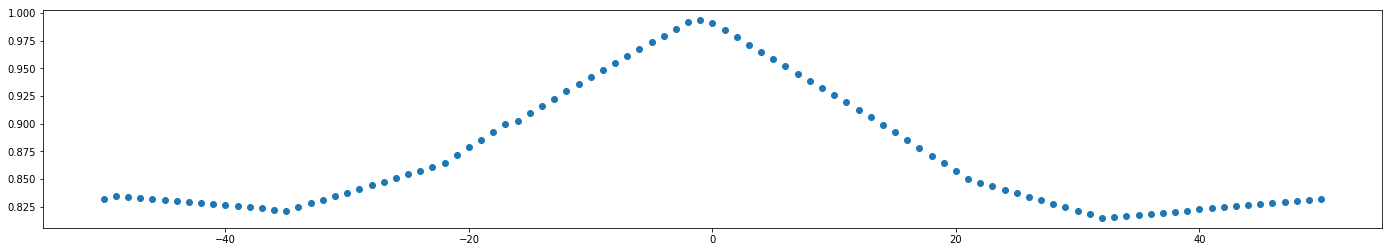

In [63]:
plt.figure(figsize=(24,4))
time = data[:,0]
heading = (360-data[:,1]-32)%360
eq_position = data[:,2]%360
plt.plot(time,heading)
plt.plot(time,eq_position)
plt.show()
plt.figure(figsize=(24,4))
lags,vals,_,_ = plt.xcorr(heading,eq_position,maxlags=50,usevlines=False)
xcorr_max = lags[np.argmax(vals)]
print("Cross Correlation Maxima : {}, Mean time lag : {:0.03}±{:0.03} secs".format(xcorr_max,np.diff(time).mean()*xcorr_max,np.diff(time).std()*abs(xcorr_max))